# ***TRAVELL RATING REVIEWS***


## **Essential Libraries**

Importing all the **Important Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## **Dataset Loading**

In [ ]:
df = pd.read_csv("google_review_ratings.csv")

## ***Data Preprocessing***

**Understanding the dataset**

In [ ]:
df.shape

(5456, 26)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


**Renaming the columns for simplicity of understanding**

In [ ]:
column_names = ['User_id', 'Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums', 'Malls', 'Zoo', 'Restaurants', 'Pubs_bars', 'Local_services', 'Burger_pizza_shops', 'Hotels_other_lodgings', 'Juice_bars', 'Art_galleries', 'Dance_clubs', 'Swimming_pools', 'Gyms', 'Bakeries', 'Beauty_spas', 'Cafes', 'View_points', 'Monuments', 'Gardens', 'Unnamed: 25']
df.columns = column_names

**Checking for categorical and numerical data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_id                5456 non-null   object 
 1   Churches               5456 non-null   float64
 2   Resorts                5456 non-null   float64
 3   Beaches                5456 non-null   float64
 4   Parks                  5456 non-null   float64
 5   Theatres               5456 non-null   float64
 6   Museums                5456 non-null   float64
 7   Malls                  5456 non-null   float64
 8   Zoo                    5456 non-null   float64
 9   Restaurants            5456 non-null   float64
 10  Pubs_bars              5456 non-null   float64
 11  Local_services         5456 non-null   object 
 12  Burger_pizza_shops     5455 non-null   float64
 13  Hotels_other_lodgings  5456 non-null   float64
 14  Juice_bars             5456 non-null   float64
 15  Art_

We have two objects(categorical data columns)
1. **User_id** - This column do not have necessary information to use therefore we can drop this column
2. **Local_services** - This column has a categorical or string data this can be handled further

**Duplicate Values**

Now, Let's check the unique values in the dataset

In [ ]:
dict = {}
for i in df.columns:
    dict[i] = df[i].value_counts().shape[0]
pd.DataFrame(dict, index = ['Unique Values']).T

,Unique Values
User_id,5456
Churches,281
Resorts,340
Beaches,328
Parks,293
Theatres,316
Museums,310
Malls,284
Zoo,334
Restaurants,353


As we can see column "Unnamed: 25" has only 2 unique values therefore this also needed to be droped along with "User_id".

So, let's drop User_id and Unnamed: 25 columns

In [ ]:
df.drop(columns = ['User_id', 'Unnamed: 25'], axis = 1, inplace = True)

**MISSING VALUES**

Now let's check the missing values in our dataset

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values_df = pd.DataFrame({'Percentage_Values': percent_missing, 'Missing_values': df.isnull().sum()})
missing_values_df

,Percentage_Values,Missing_values
Churches,0.000000,0
Resorts,0.000000,0
Beaches,0.000000,0
Parks,0.000000,0
Theatres,0.000000,0
Museums,0.000000,0
Malls,0.000000,0
Zoo,0.000000,0
Restaurants,0.000000,0
Pubs_bars,0.000000,0


Not Many missing values exists in our data set

Therefore, we will see exact row/data point that have missing values

In [ ]:
df[df.isna().any(axis=1)]

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_bars,Local_services,Burger_pizza_shops,Hotels_other_lodgings,Juice_bars,Art_galleries,Dance_clubs,Swimming_pools,Gyms,Bakeries,Beauty_spas,Cafes,View_points,Monuments,Gardens
1347,1.06,1.10,5.00,3.28,5.00,5.00,5.00,1.83,1.81,5.00,5,1.74,1.73,1.74,1.77,1.80,0.0,0.00,0.0,0.00,0.0,5.0,0.26,NaN
2712,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,2\t2.,NaN,0.84,5.00,5.00,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.00,2.57


we have 2 NULL values
1. in Burger_pizza_shops
2. in Gardens

Not only null values we also have one string values in column Local_services

In [ ]:
df['Local_services'][df['Local_services'] == '2\t2.']

2712    2\t2.
Name: Local_services, dtype: object

We replace the string value to NULL value so we can impute it using Simple Imputer.

In [ ]:
df.loc[2712, 'Local_services'] = np.NaN

Now let's impute our NULL values using Simple Imputer.

In [ ]:
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')
df = impute.fit_transform(df)

After impution our data frame is converted to ndarray. To procede further we have to convert the ndarray to dataframe again.

In [ ]:
u_column_names =['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums', 'Malls', 'Zoo', 'Restaurants', 'Pubs_bars', 'Local_services', 'Burger_pizza_shops', 'Hotels_other_lodgings', 'Juice_bars', 'Art_galleries', 'Dance_clubs', 'Swimming_pools', 'Gyms', 'Bakeries', 'Beauty_spas', 'Cafes', 'View_points', 'Monuments', 'Gardens']

idf = pd.DataFrame(df, columns = u_column_names)
idf

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_bars,Local_services,Burger_pizza_shops,Hotels_other_lodgings,Juice_bars,Art_galleries,Dance_clubs,Swimming_pools,Gyms,Bakeries,Beauty_spas,Cafes,View_points,Monuments,Gardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


Now let's check whether all values are converted to float or integer or not.

In [ ]:
idf.loc[2712, 'Local_services']

2.550071494042163

In [ ]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churches               5456 non-null   float64
 1   Resorts                5456 non-null   float64
 2   Beaches                5456 non-null   float64
 3   Parks                  5456 non-null   float64
 4   Theatres               5456 non-null   float64
 5   Museums                5456 non-null   float64
 6   Malls                  5456 non-null   float64
 7   Zoo                    5456 non-null   float64
 8   Restaurants            5456 non-null   float64
 9   Pubs_bars              5456 non-null   float64
 10  Local_services         5456 non-null   float64
 11  Burger_pizza_shops     5456 non-null   float64
 12  Hotels_other_lodgings  5456 non-null   float64
 13  Juice_bars             5456 non-null   float64
 14  Art_galleries          5456 non-null   float64
 15  Danc

## **Exploratory Data Analysis (EDA)**

First step in EDA is to check the correlation between features.

<Axes: >

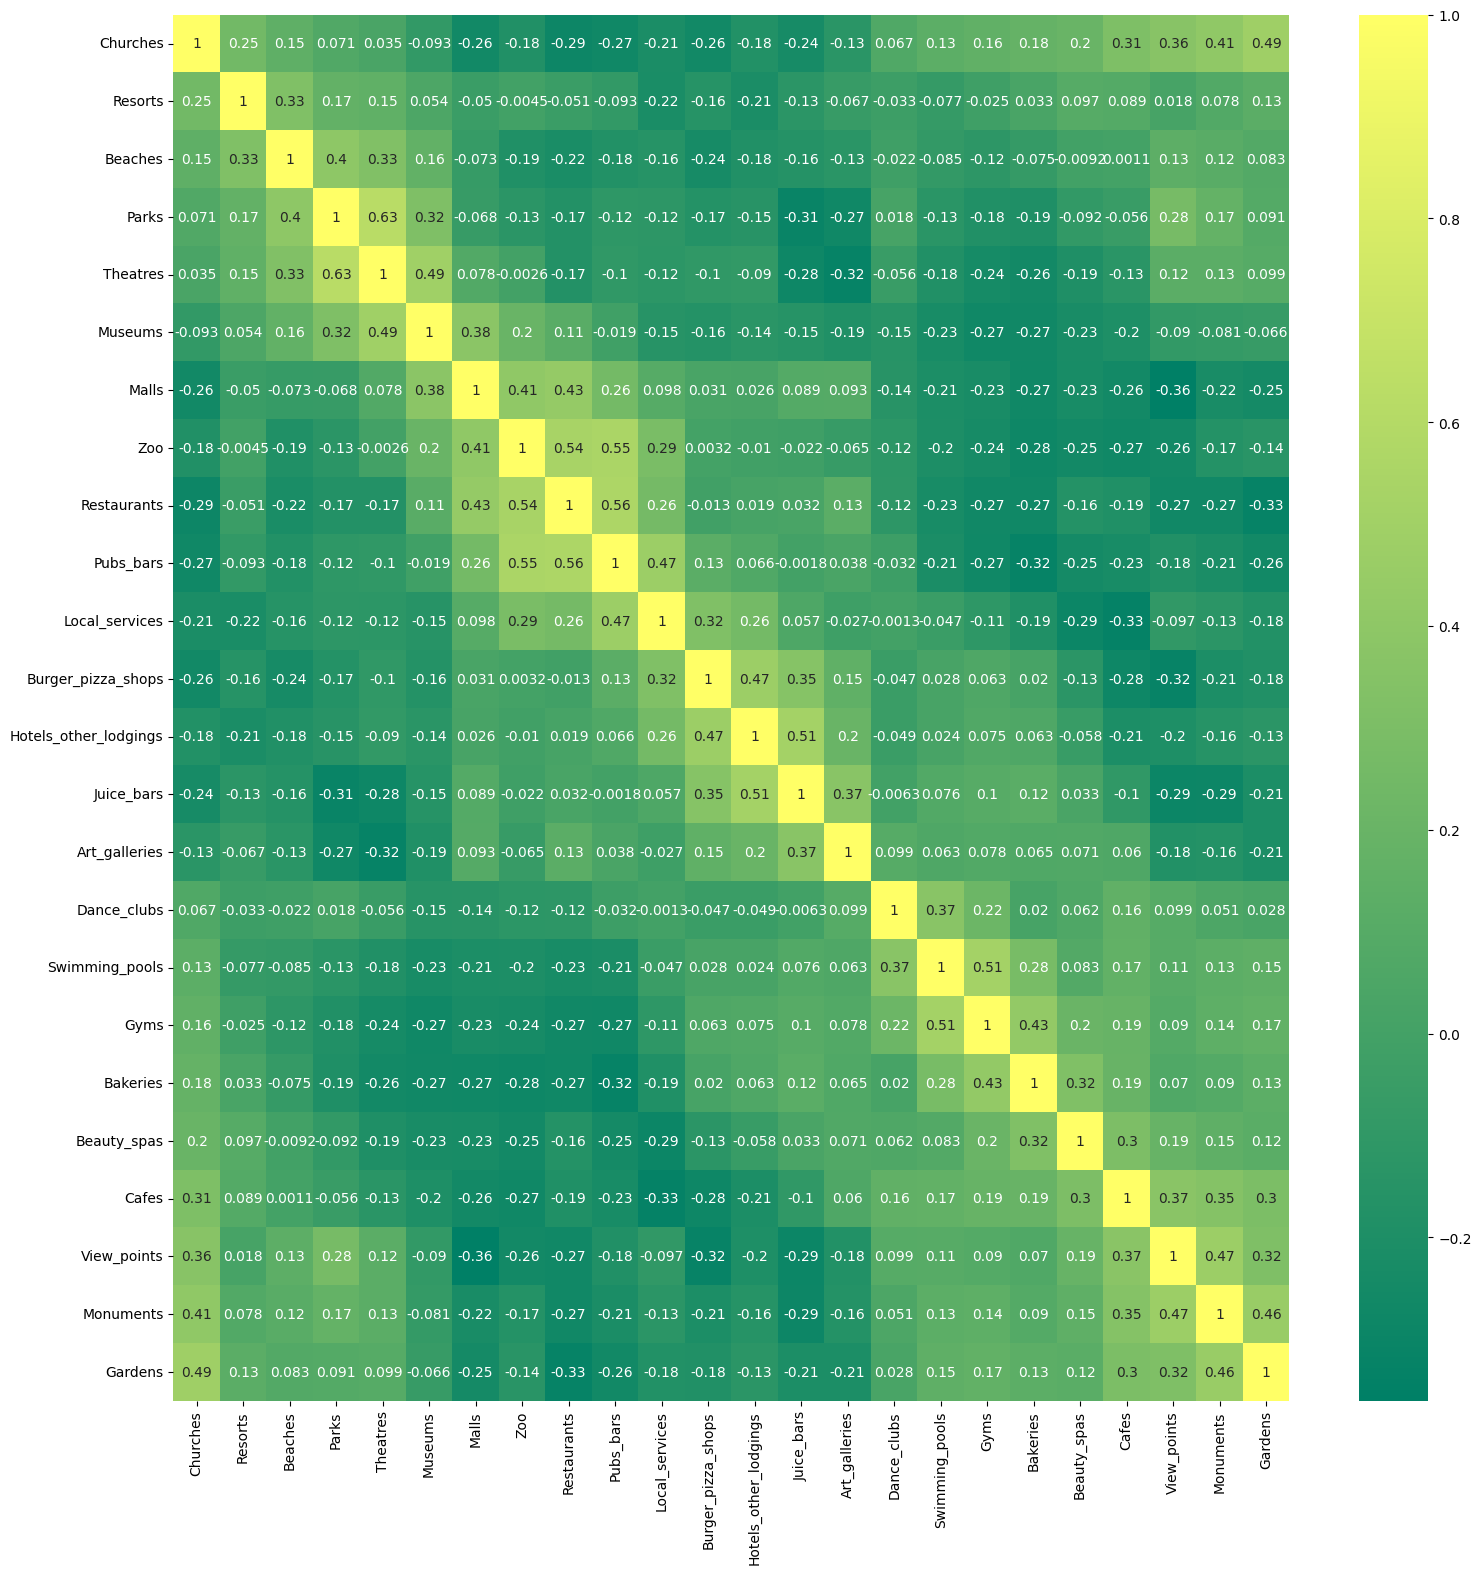

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(idf.corr(), cbar = True, annot = True, cmap = 'summer')

Features are not highly correlated with each other, therefore no need to remove any feature.

We can also check the correlation or any relation between the features by drawing pairplot.

<Figure size 1800x1800 with 0 Axes>

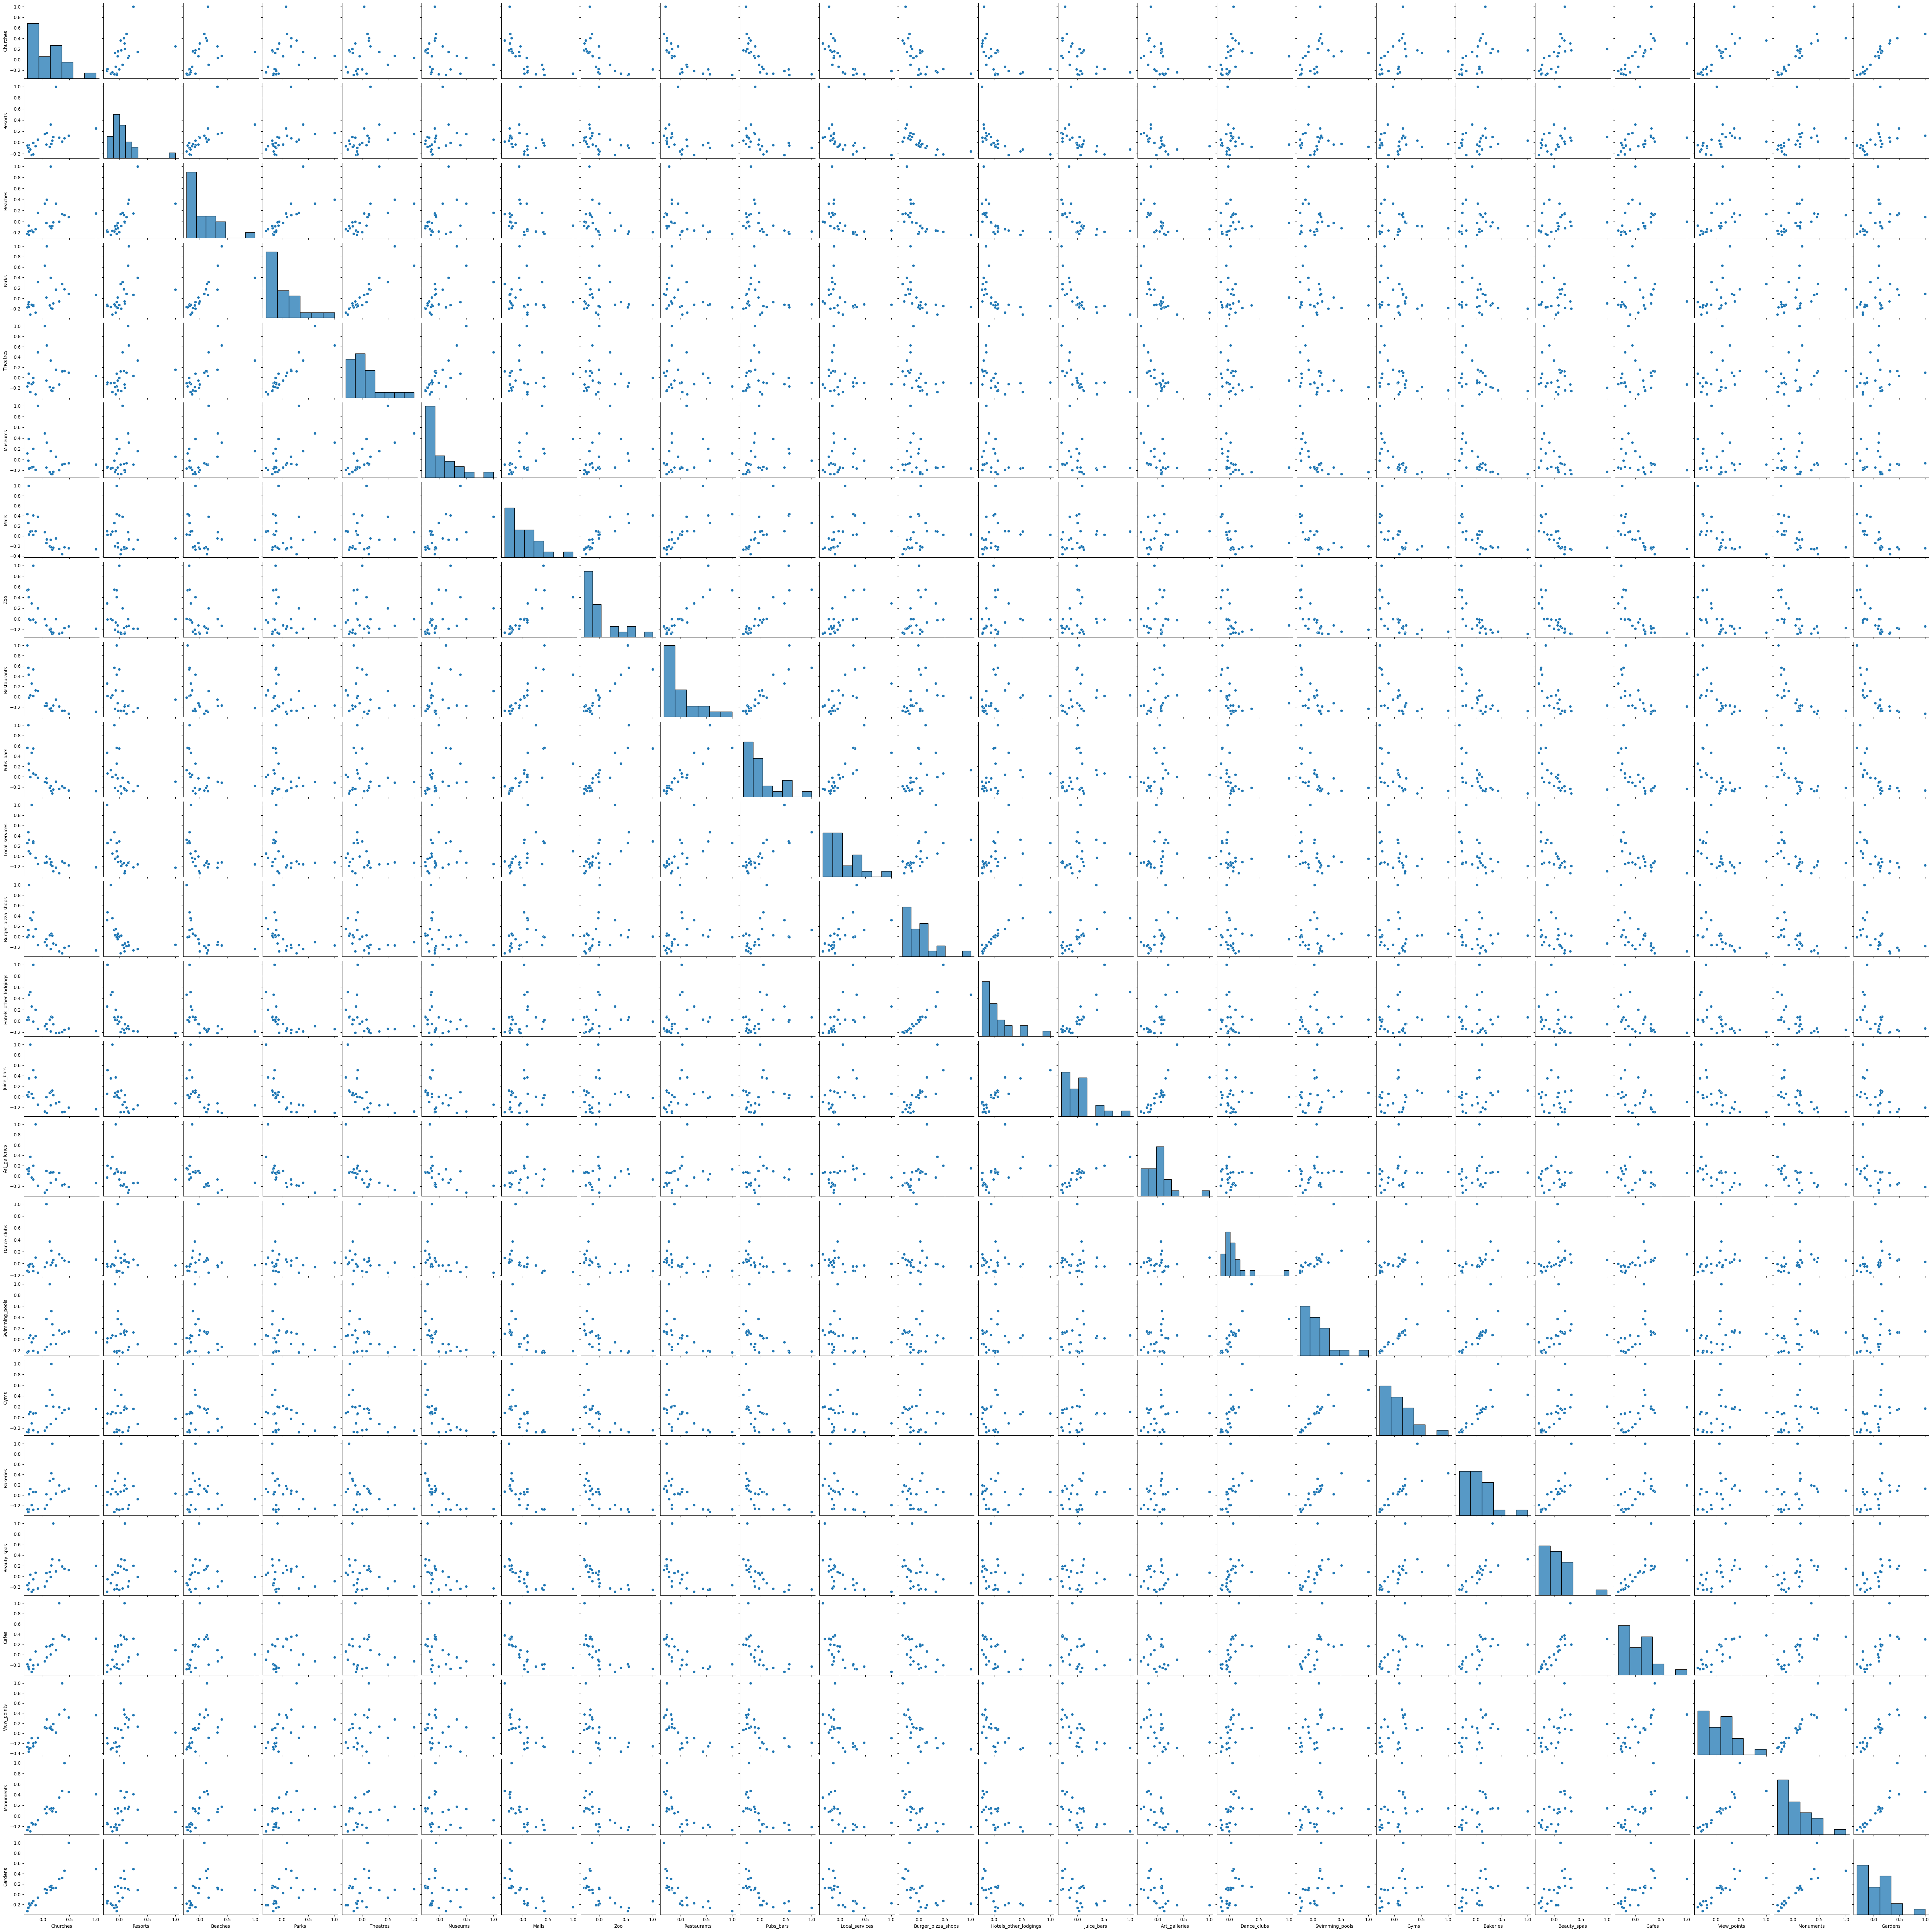

In [ ]:
plt.figure(figsize=(18, 18))
sns.pairplot(idf.corr())

**Statistical Data Analysis**

Since all features are in float data type therefore we can do statistical data analysis of features.

In [ ]:
idf.describe().T

,count,mean,std,min,25%,50%,75%,max
Churches,5456.0,1.455720,0.827604,0.00,0.92,1.340,1.8100,5.0
Resorts,5456.0,2.319707,1.421438,0.00,1.36,1.905,2.6825,5.0
Beaches,5456.0,2.489331,1.247815,0.00,1.54,2.060,2.7400,5.0
Parks,5456.0,2.796886,1.309159,0.83,1.73,2.460,4.0925,5.0
Theatres,5456.0,2.958941,1.339056,1.12,1.77,2.670,4.3125,5.0
Museums,5456.0,2.893490,1.282400,1.11,1.79,2.680,3.8400,5.0
Malls,5456.0,3.351395,1.413492,1.12,1.93,3.230,5.0000,5.0
Zoo,5456.0,2.540795,1.111391,0.86,1.62,2.170,3.1900,5.0
Restaurants,5456.0,3.126019,1.356802,0.84,1.80,2.800,5.0000,5.0
Pubs_bars,5456.0,2.832729,1.307665,0.81,1.64,2.680,3.5300,5.0


Let's do EDA for each feature using distplot to visualize the distribution of our dataset.

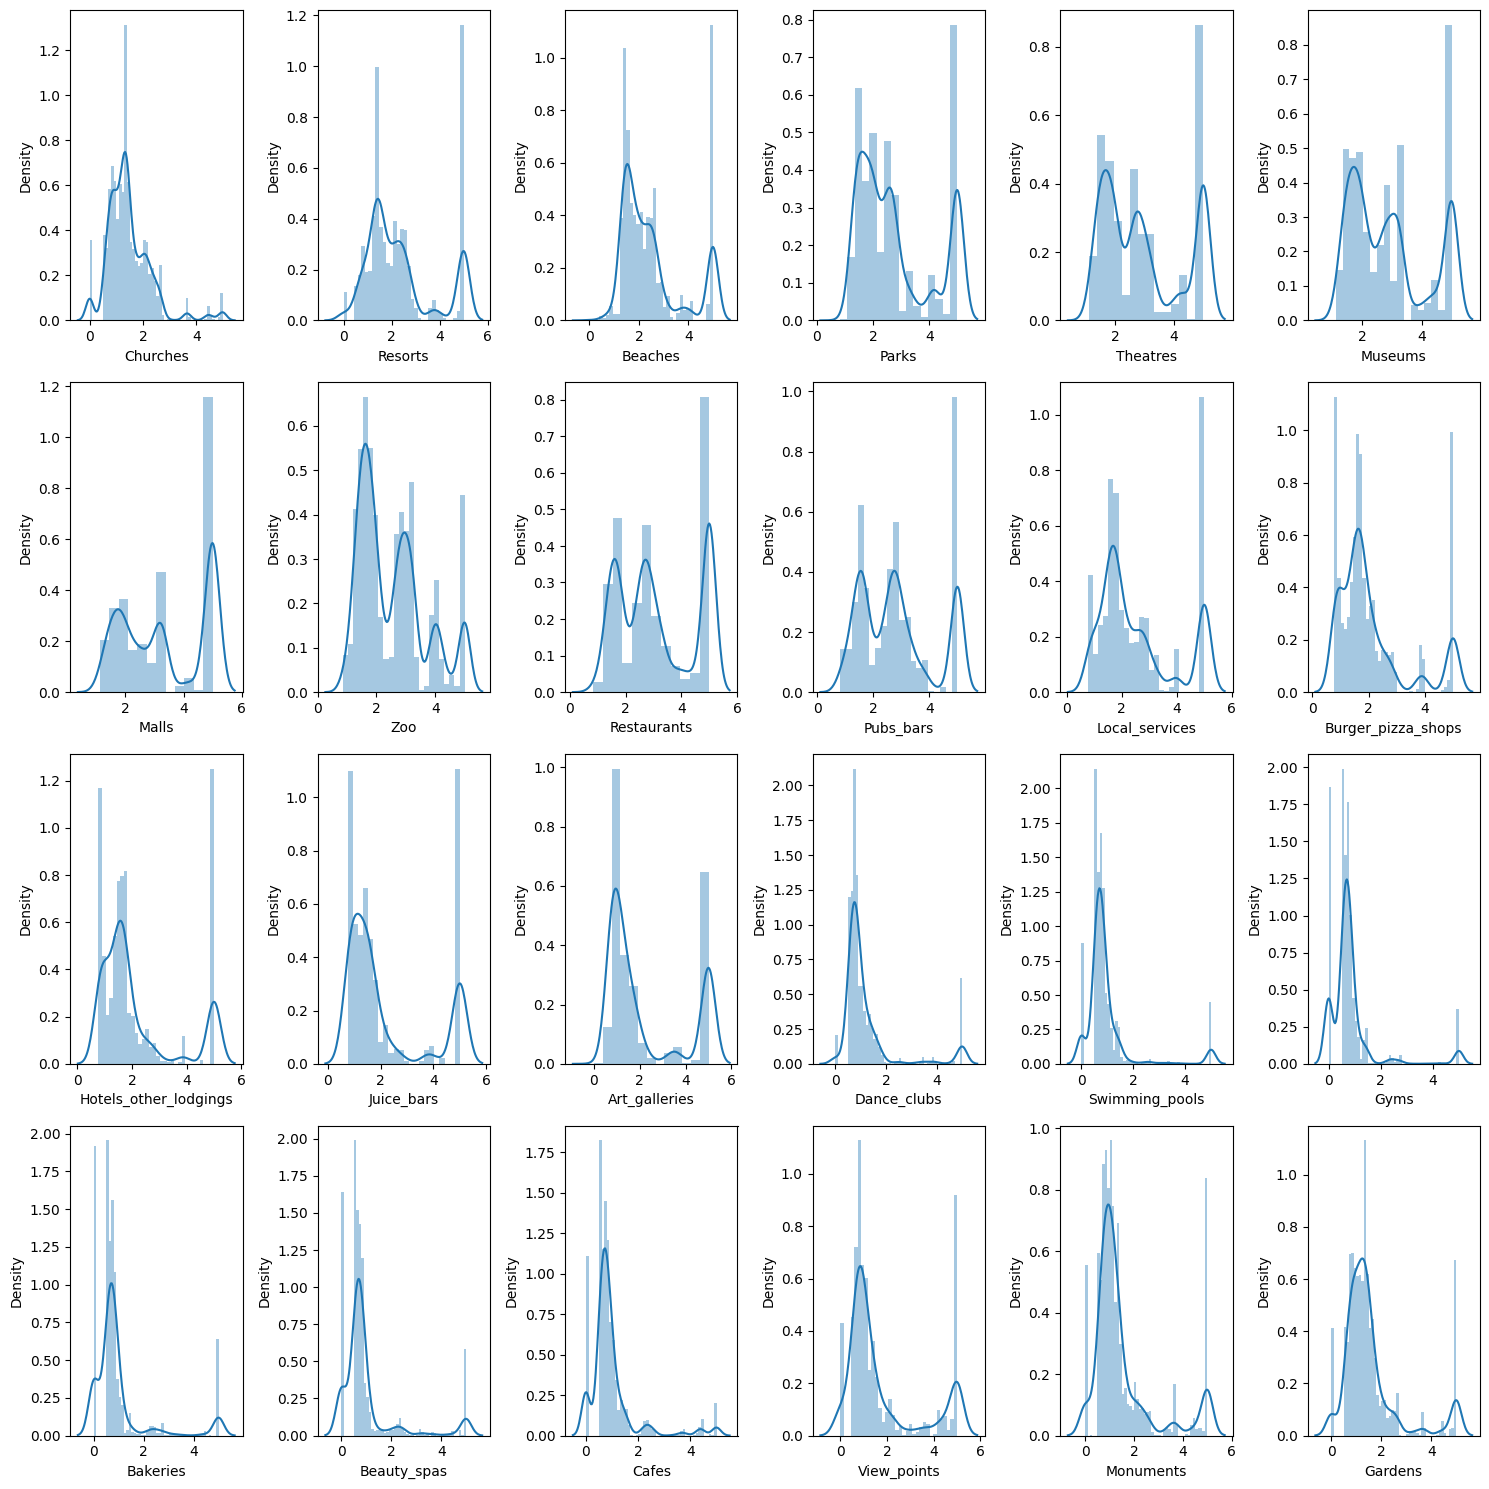

In [ ]:
count=1
plt.subplots(figsize=(15, 15))
for i in idf.columns:
    plt.subplot(4,6,count)
    sns.distplot(idf[i])
    count+=1

plt.tight_layout()
plt.show()

Now we will look for no of reviews under each category to understand the reviews distribution among the each category

Text(0.5, 1.0, 'No of reviews under each category')

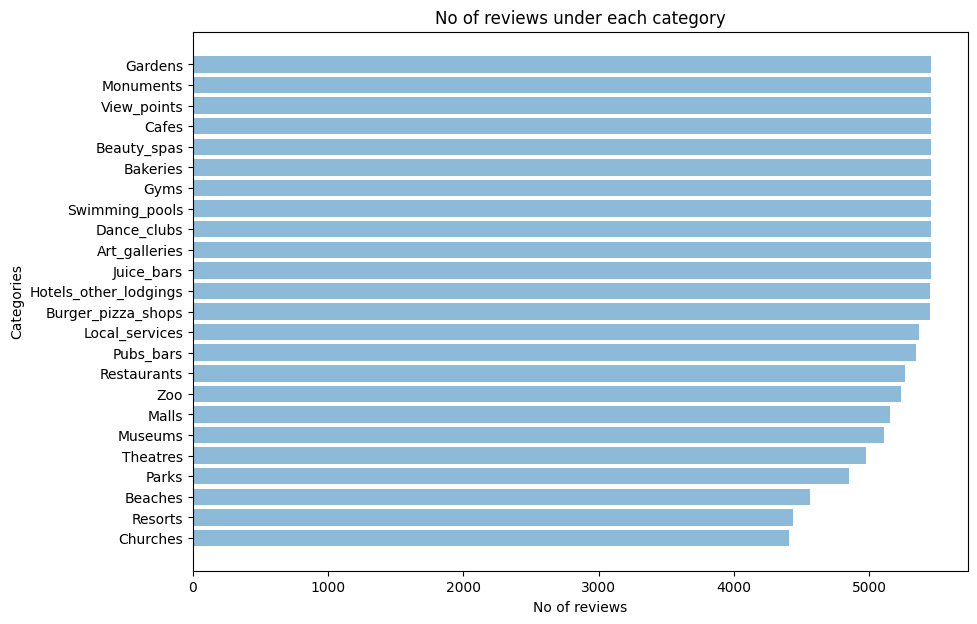

In [ ]:
no_of_zeros = idf[u_column_names].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(10,7))
plt.barh(u_column_names, no_of_zeros.values, align='center', alpha=0.5,)


plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

Highest reviews are given under Gardens and Monuments.

Now we will look for no of Categories among the no of reviews to understand the category distribution among the reviews.

Text(0.5, 1.0, 'No of Categories vs No of reviews')

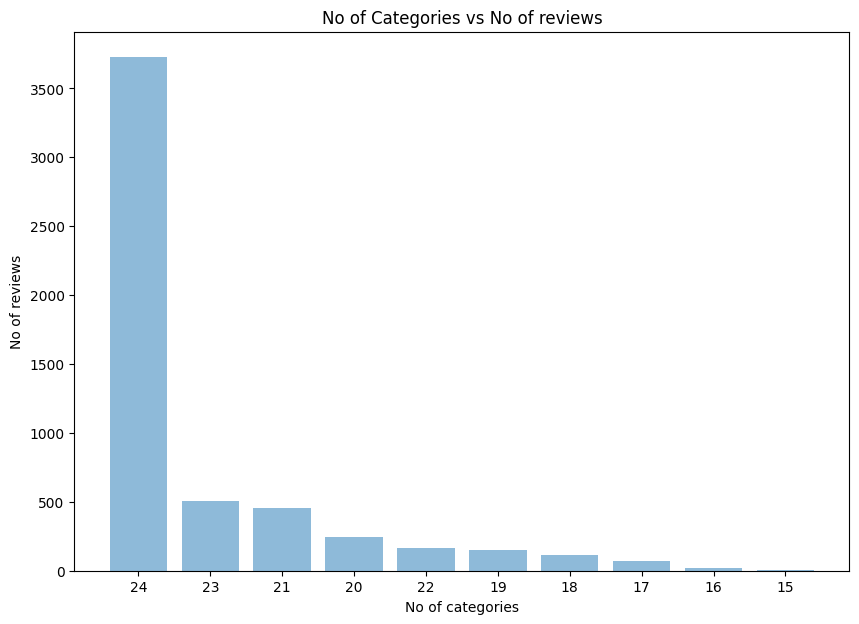

In [ ]:
no_of_reviews = idf[u_column_names].astype(bool).sum(axis=1).value_counts()

plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)

plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)

plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

Higherst reviews are given under category 24.

Now we will look for Average rating per Category to understand the rating distribution among the each category

Text(0.5, 1.0, 'Average rating per Category')

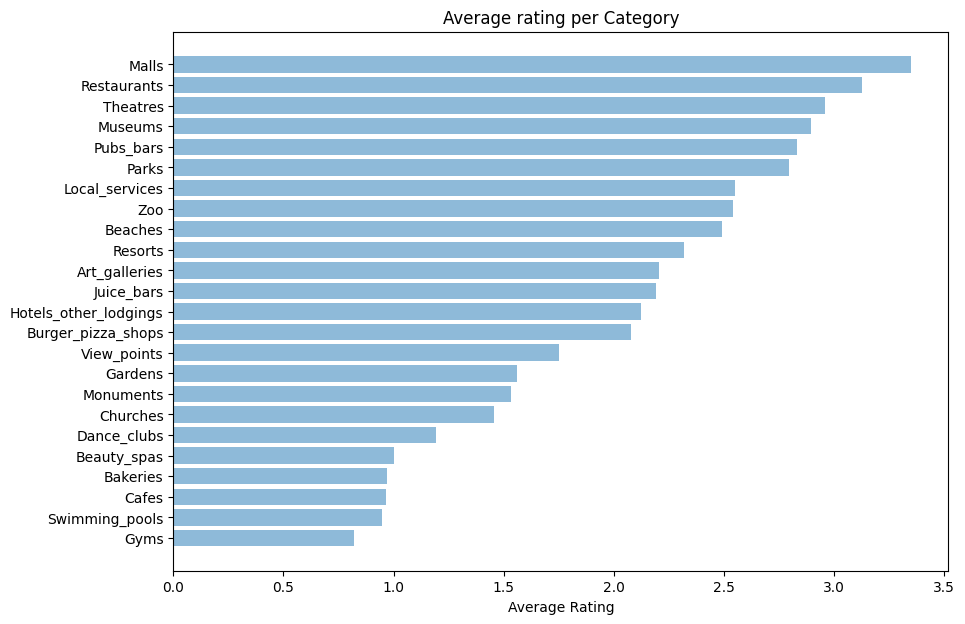

In [ ]:
avg_rating = idf[u_column_names].mean()
avg_rating = avg_rating.sort_values()

plt.figure(figsize=(10,7))
plt.barh(np.arange(len(u_column_names)), avg_rating.values, align='center', alpha=0.5)

plt.yticks(np.arange(len(u_column_names)), avg_rating.index)

plt.xlabel('Average Rating')
plt.title('Average rating per Category')

Highest rating is given under Malls section then Restaurants then to others.

Let's have more understanding of our dataset by using the boxplot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Churches'),
  Text(1, 0, 'Resorts'),
  Text(2, 0, 'Beaches'),
  Text(3, 0, 'Parks'),
  Text(4, 0, 'Theatres'),
  Text(5, 0, 'Museums'),
  Text(6, 0, 'Malls'),
  Text(7, 0, 'Zoo'),
  Text(8, 0, 'Restaurants'),
  Text(9, 0, 'Pubs_bars'),
  Text(10, 0, 'Local_services'),
  Text(11, 0, 'Burger_pizza_shops'),
  Text(12, 0, 'Hotels_other_lodgings'),
  Text(13, 0, 'Juice_bars'),
  Text(14, 0, 'Art_galleries'),
  Text(15, 0, 'Dance_clubs'),
  Text(16, 0, 'Swimming_pools'),
  Text(17, 0, 'Gyms'),
  Text(18, 0, 'Bakeries'),
  Text(19, 0, 'Beauty_spas'),
  Text(20, 0, 'Cafes'),
  Text(21, 0, 'View_points'),
  Text(22, 0, 'Monuments'),
  Text(23, 0, 'Gardens')])

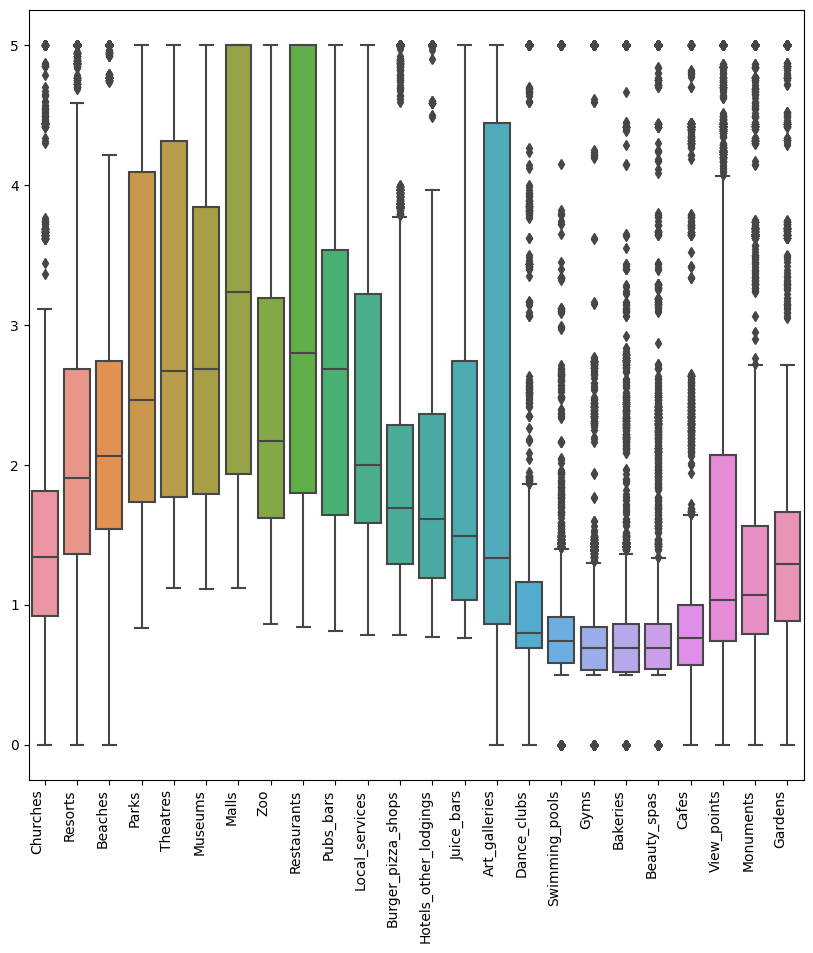

In [ ]:
fig = plt.figure(figsize = (10, 10))
sns.boxplot(idf[u_column_names])
plt.xticks(rotation=90, ha='right')

## **Feature Scaling**

Since we have a high dispersion in the dataset, we need to do feature scaling using Standard Scaler as it will make the data more standardized.

In [ ]:
standard_df = idf.copy()
cols_S = list(standard_df.columns)

In [ ]:
sc = StandardScaler()
standard_df = sc.fit_transform(standard_df)
std_df = pd.DataFrame(standard_df, columns = cols_S)      # converting standard_df in to dataframe as it is ndarray after scaling

## **Clustering**

### **1. K - Means Clustering**

Using Elbow method, We will calculate the value of K for doing KMeans Clustering.

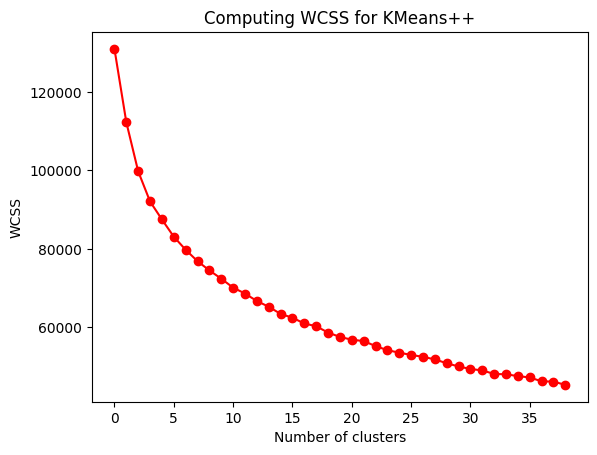

In [ ]:
wcss = []
for i in range( 1, 40 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=400) 
    kmeans.fit_predict(std_df)
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

By looking the above Graph we can see that K can range from 4 to 6.
Therefore we will take K = 5

In [ ]:
kmean= KMeans(5)
kmean.fit(std_df)
labels=kmean.labels_ + 1

In [ ]:
pred_Kmeans=pd.concat([std_df, pd.DataFrame({"CLUSTER":labels})], axis=1)
pred_Kmeans["CLUSTER"] = pred_Kmeans["CLUSTER"]
pred_Kmeans.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_bars,Local_services,Burger_pizza_shops,Hotels_other_lodgings,Juice_bars,Art_galleries,Dance_clubs,Swimming_pools,Gyms,Bakeries,Beauty_spas,Cafes,View_points,Monuments,Gardens,CLUSTER
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223,5
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223,5
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223,5
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,-0.593603,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223,5
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223,5


In [ ]:
pred_Kmeans["CLUSTER"].unique()

array([5, 3, 4, 2, 1], dtype=int32)

#### **Interpretation of Clusters**

Now, We  will try to understand the interpretation of Clusters formed.

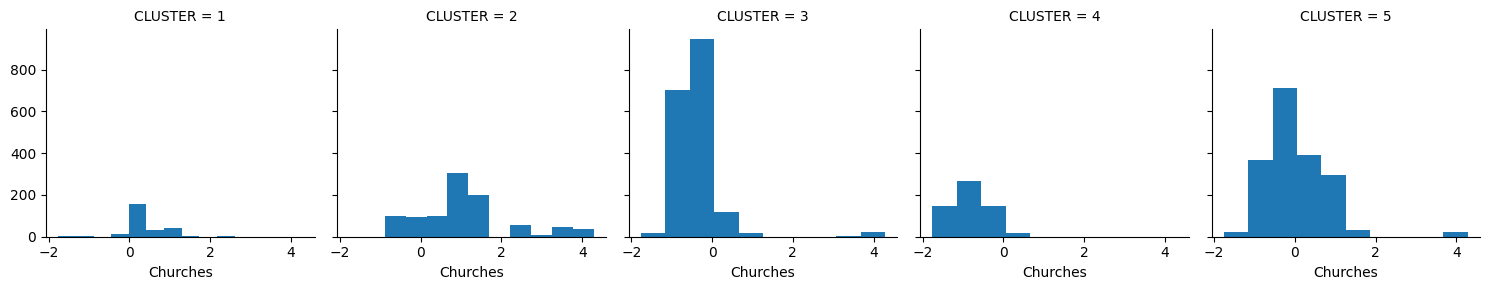

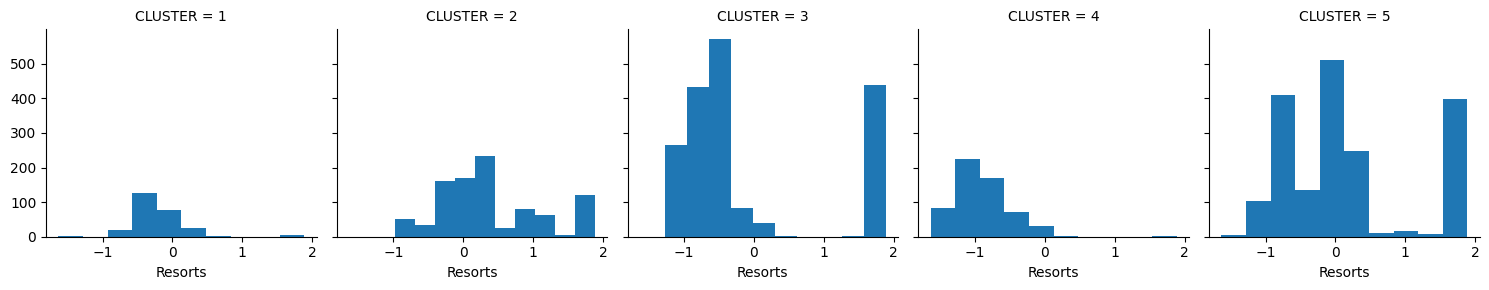

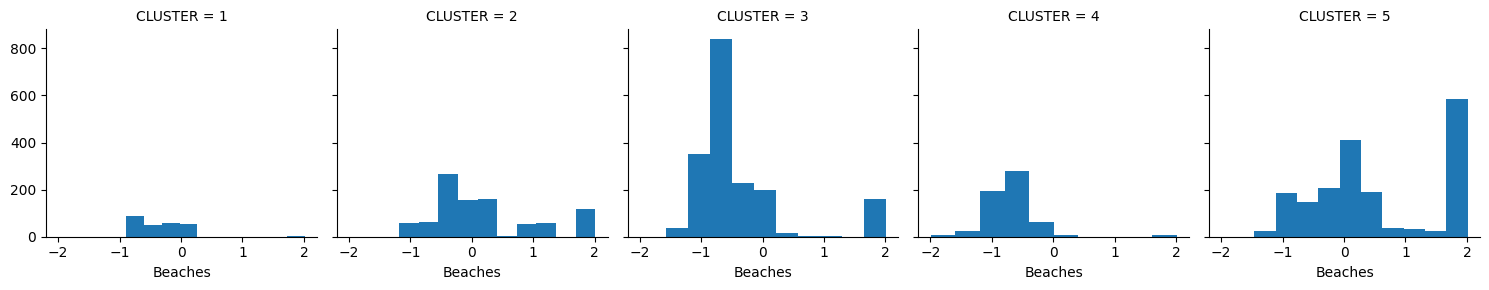

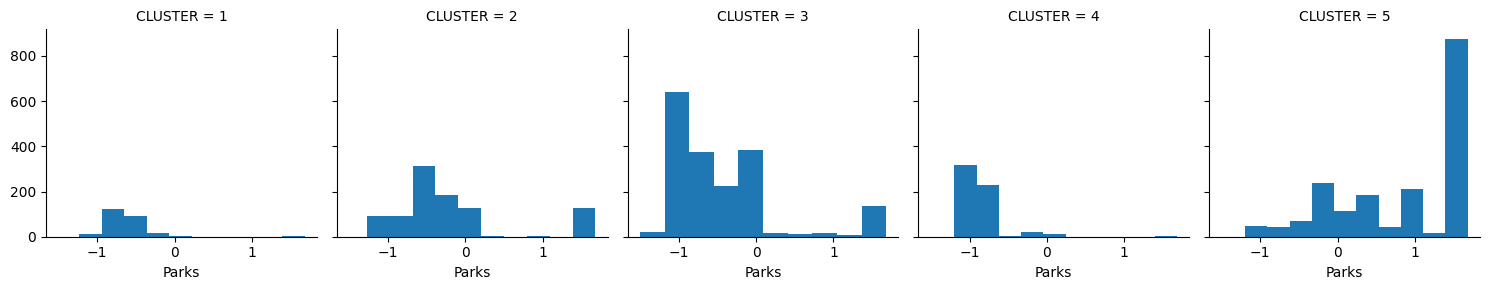

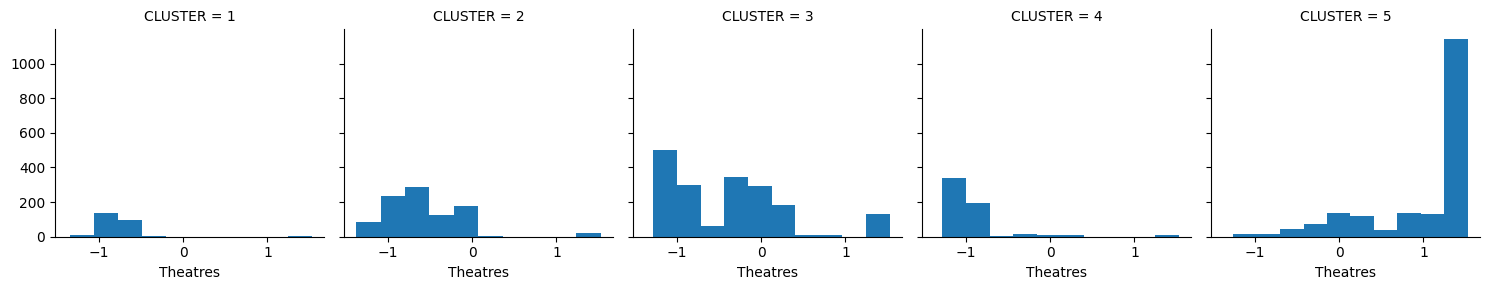

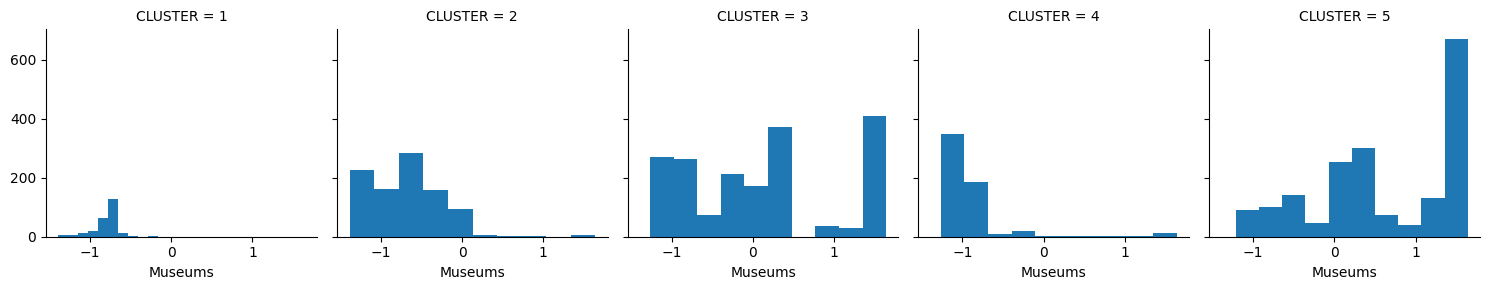

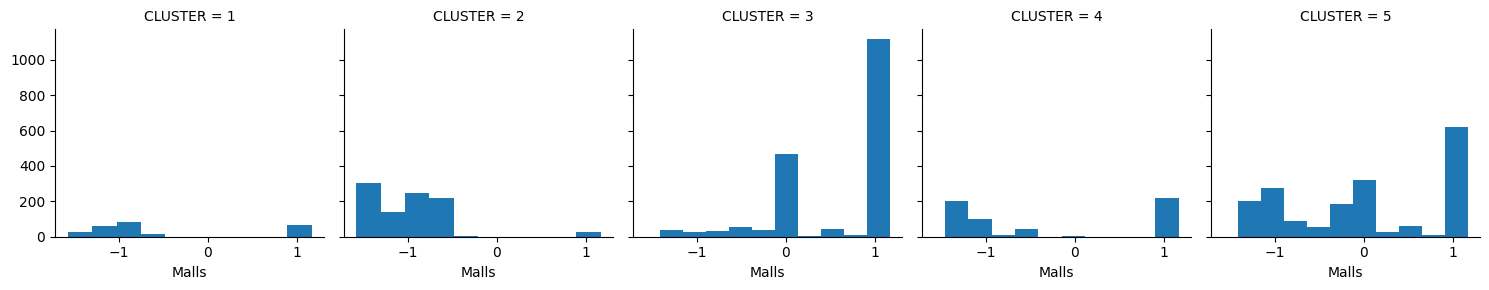

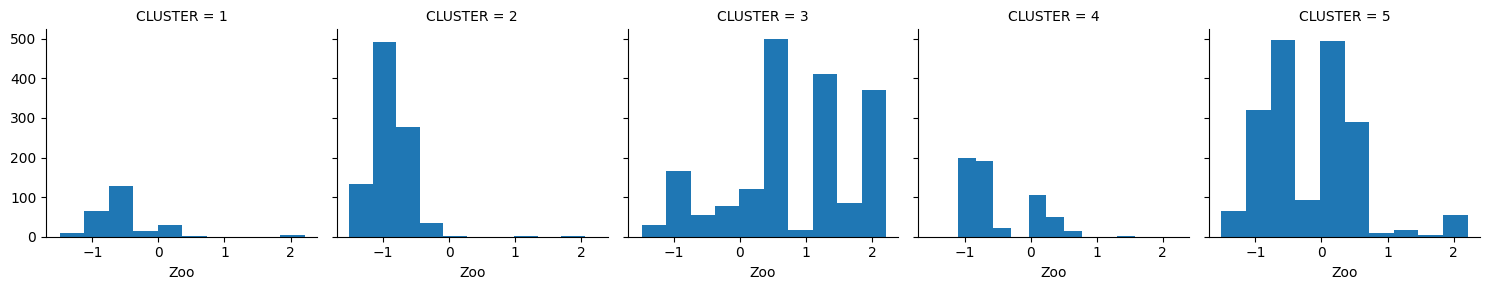

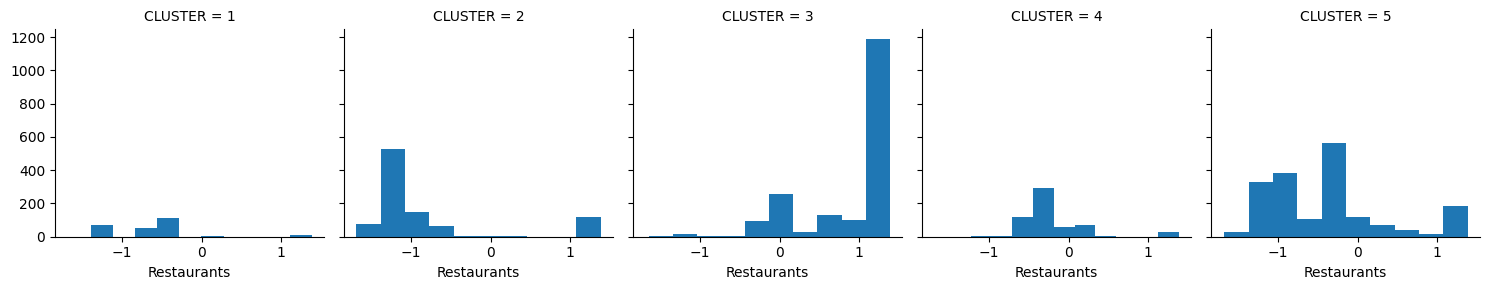

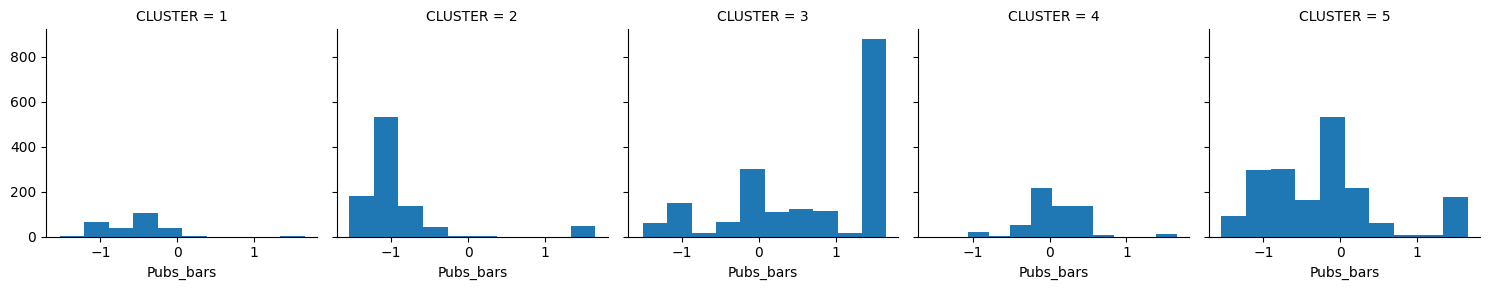

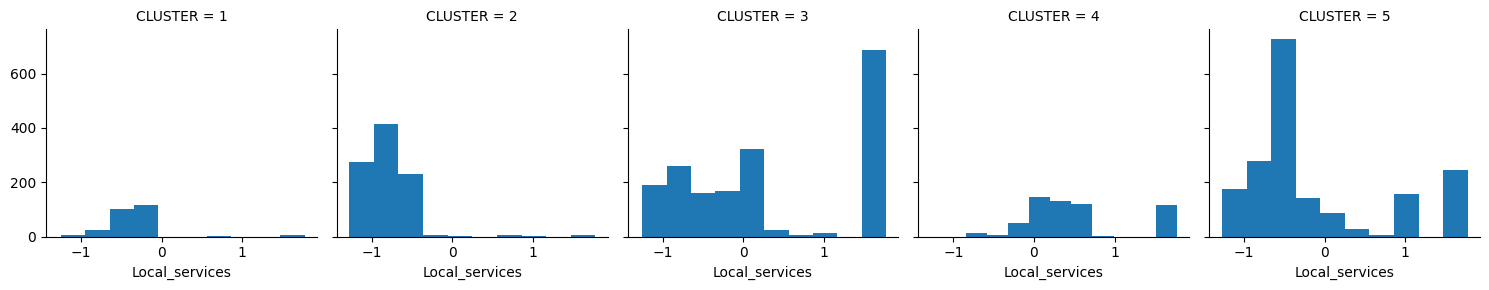

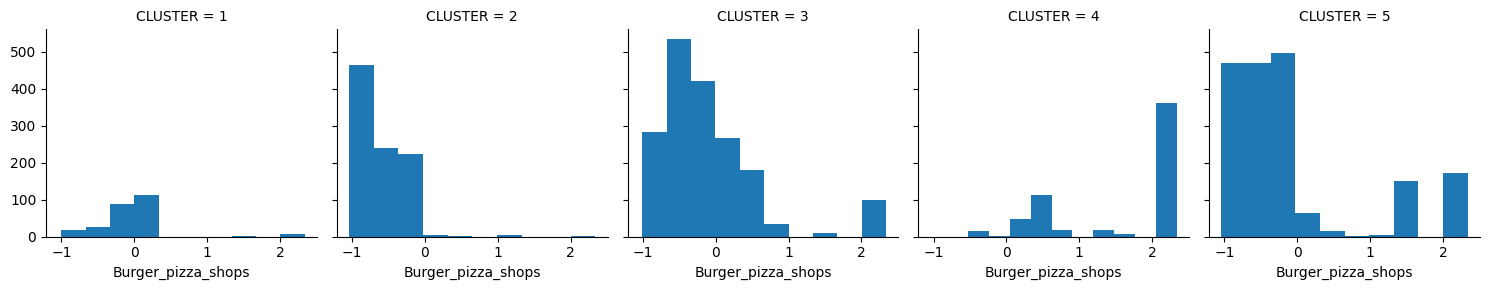

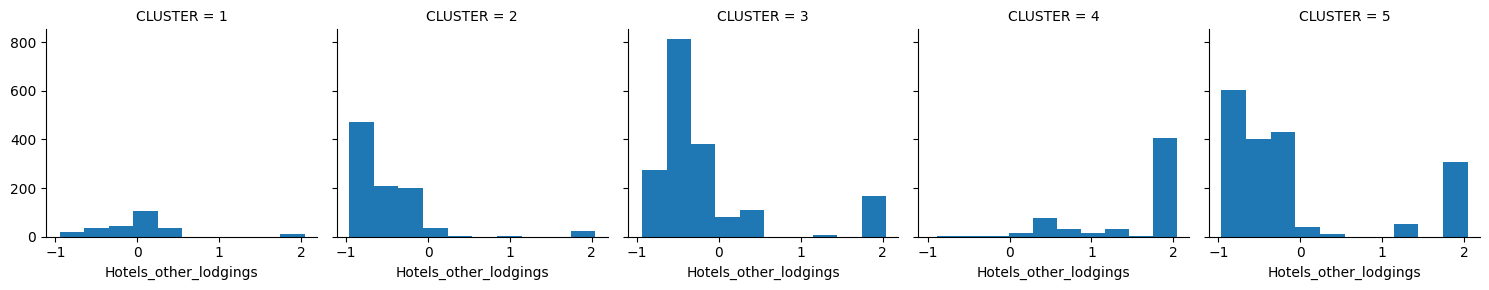

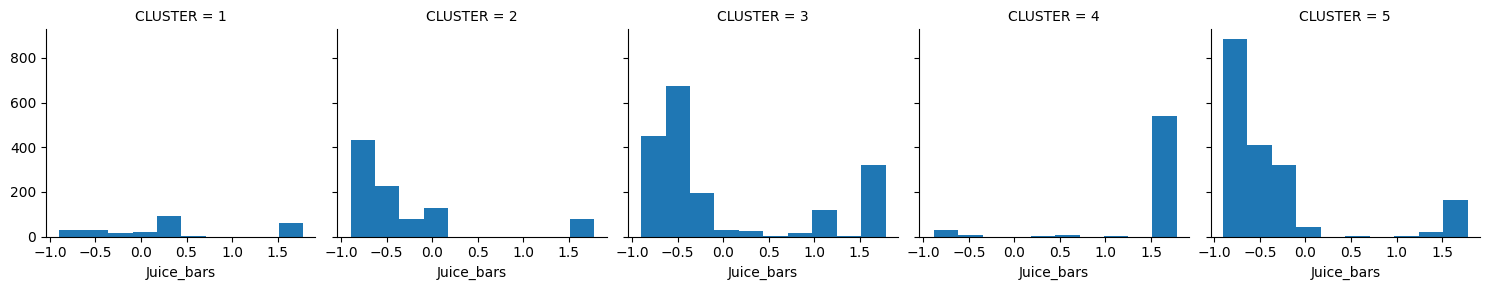

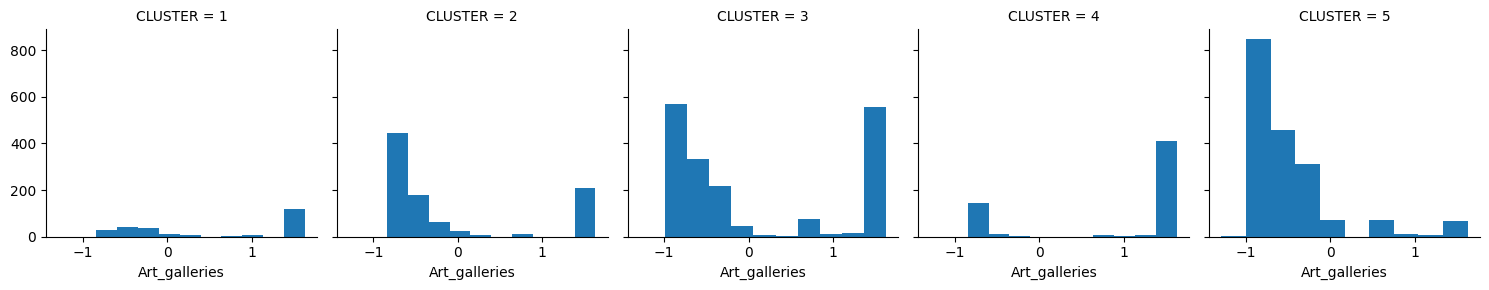

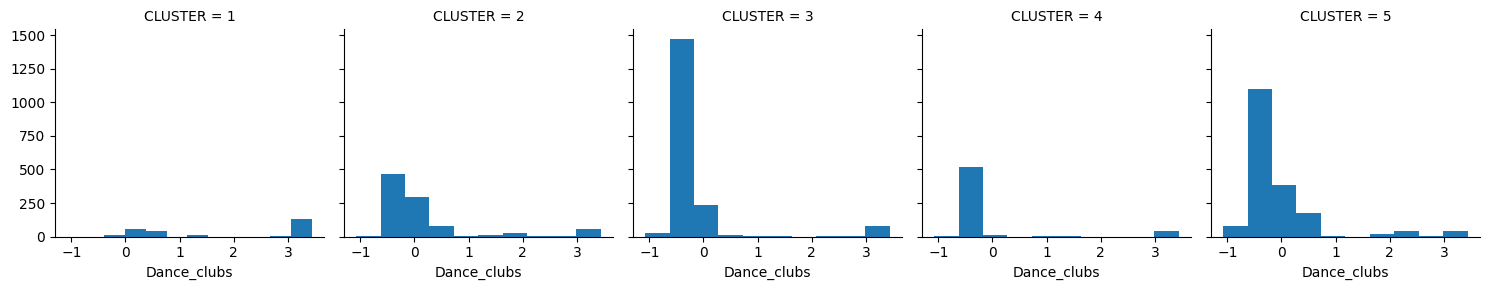

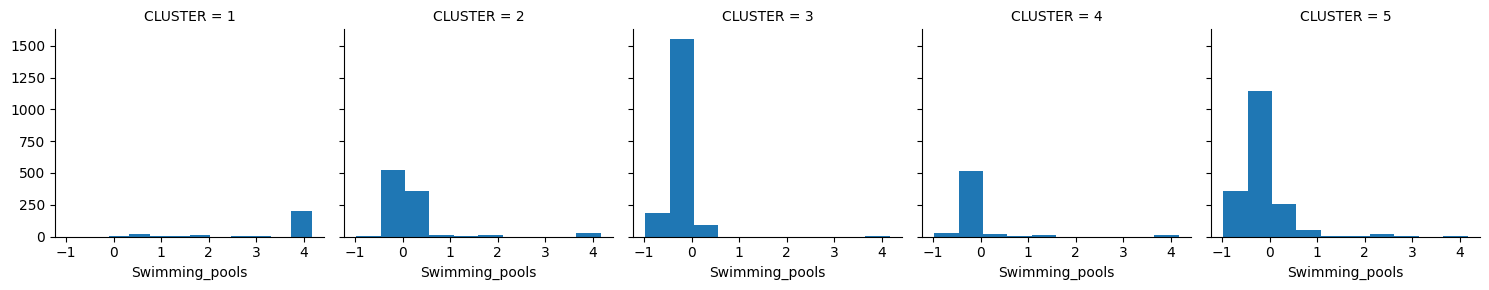

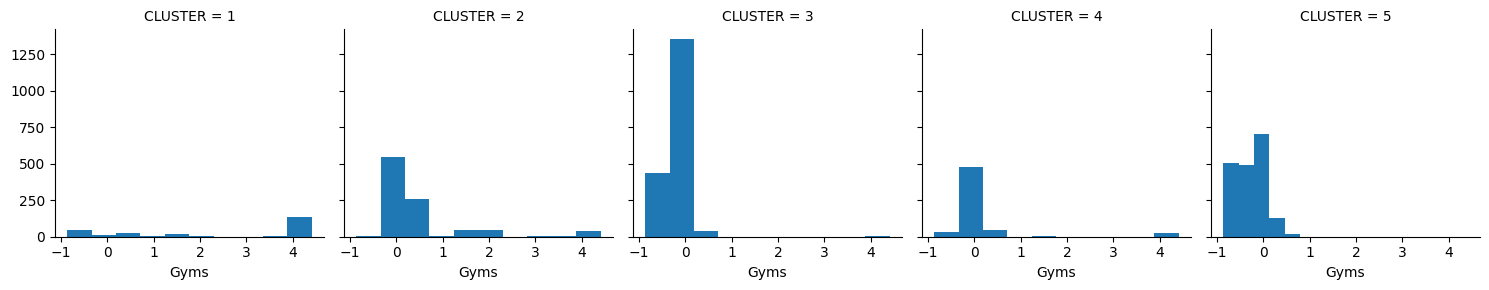

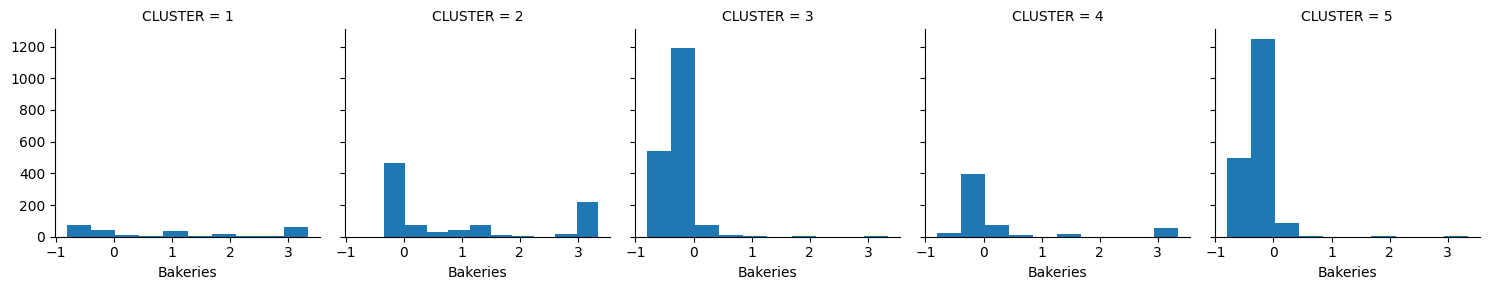

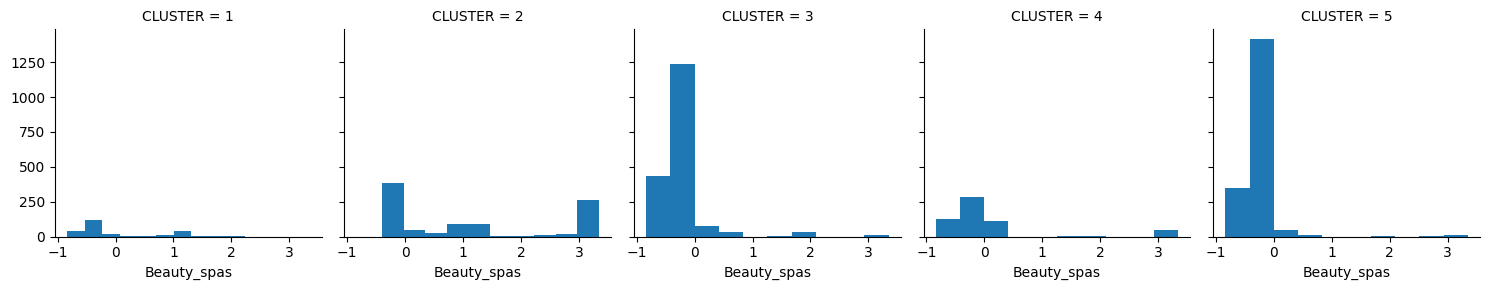

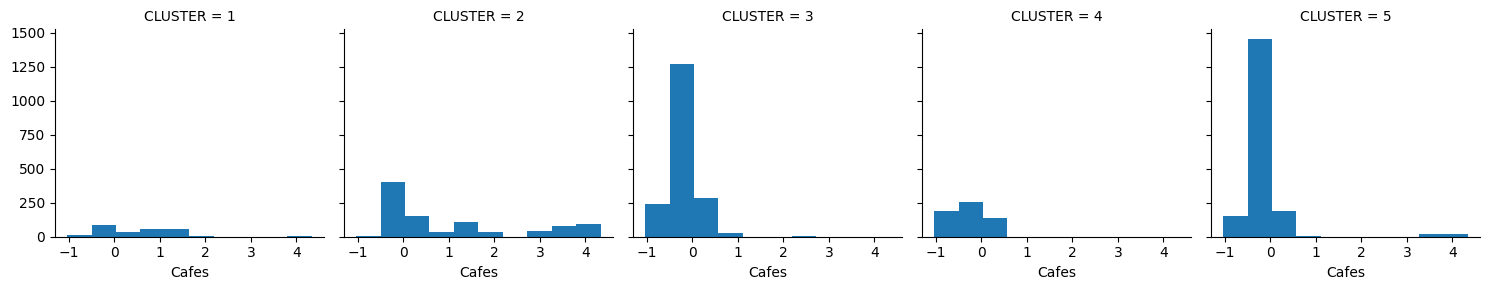

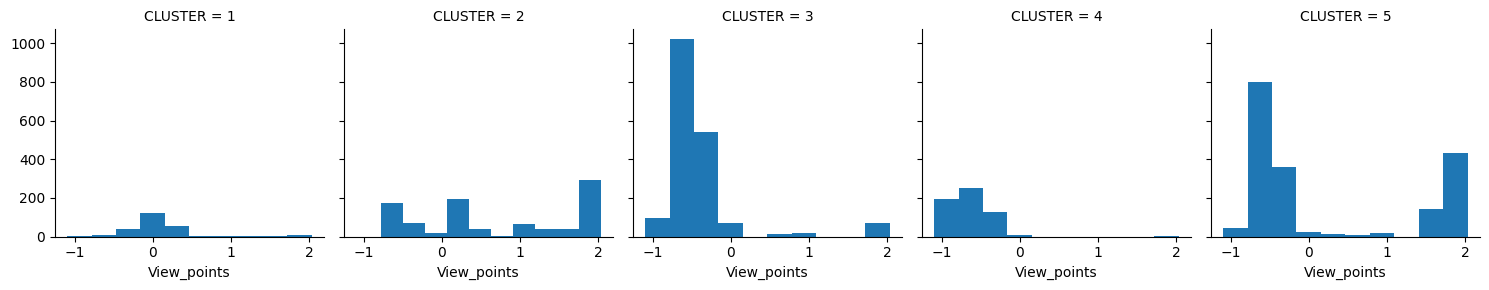

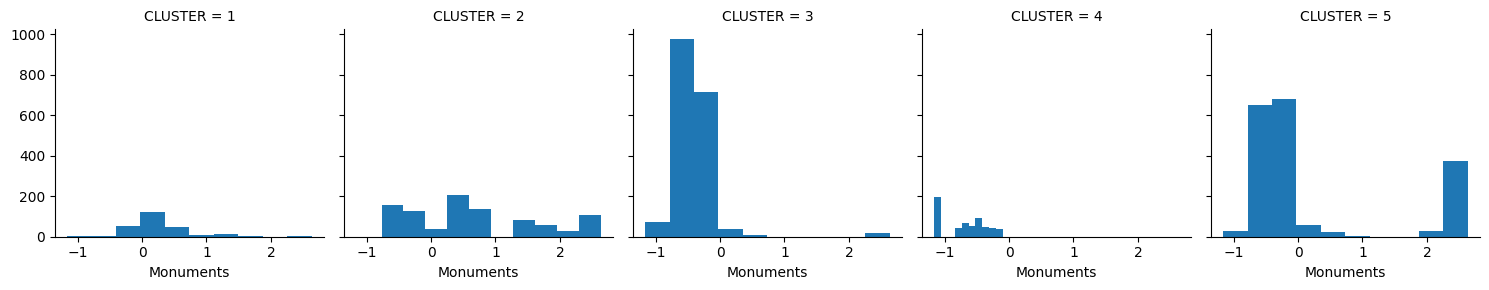

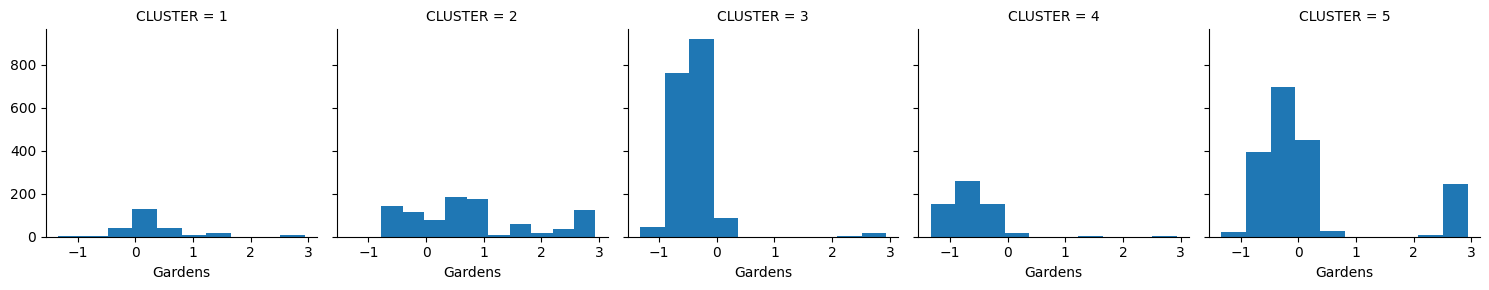

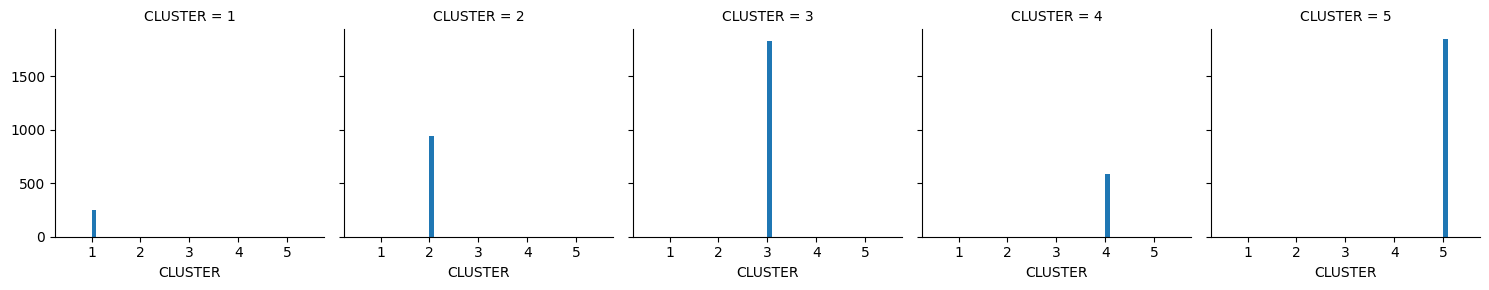

In [ ]:
for c in pred_Kmeans:
    grid= sns.FacetGrid(pred_Kmeans, col='CLUSTER')
    grid.map(plt.hist, c)

plt.tight_layout()

From above we can see that Cluster 1 is Data Points and Cluster 3 has maximium Data Points.

And we can also say that:

Cluster 1 -> Rating 1

Cluster 2 -> Rating 2

Cluster 3 -> Rating 3

Cluster 4 -> Rating 4

Cluster 5 -> Rating 5

In [ ]:
print('Clusters and no. of data points in them')
pred_Kmeans["CLUSTER"].value_counts()

Clusters and no. of data points in them


5    1846
3    1833
2     940
4     584
1     253
Name: CLUSTER, dtype: int64

#### **Visualization of CLUSTERS**

Let's Visualize the Clusters formed.

In [ ]:
Cluster_df = pred_Kmeans.copy()

dist = 1 - cosine_similarity(Cluster_df)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(5456, 2)

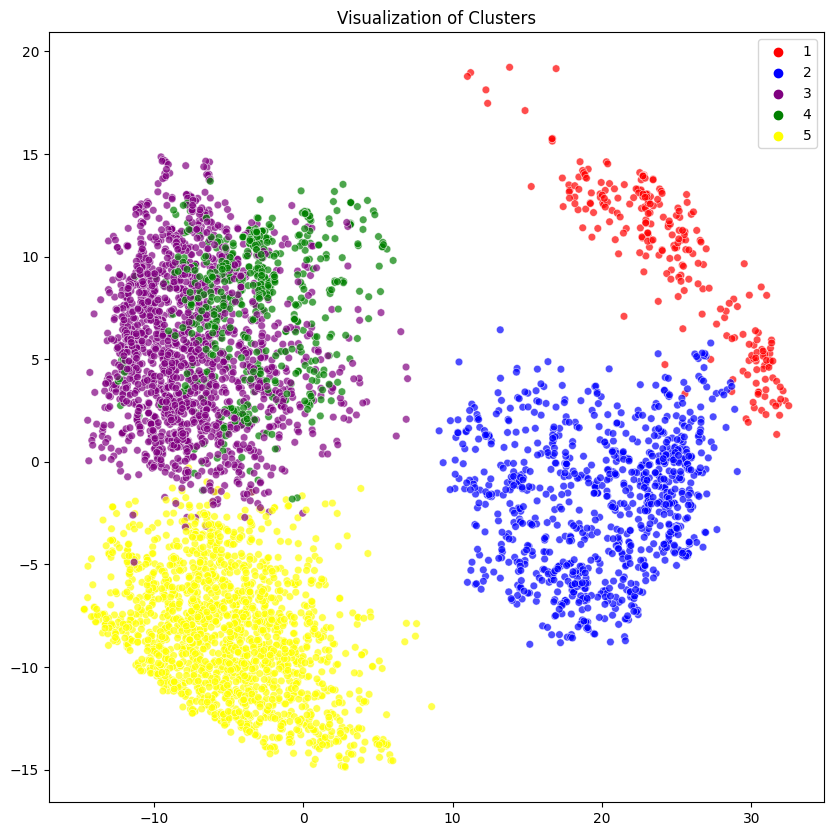

In [ ]:
X, Y = X_PCA[:, 0], X_PCA[:, 1]

plt.figure(figsize = (10, 10))
num_clusters = 5
colors = ['red', 'blue', 'purple', 'green', 'yellow']
ax = sns.scatterplot(x = X,y =  Y, hue= labels, palette=colors, alpha=0.70, s = 30)
plt.title('Visualization of Clusters')
plt.show()

### **2. Agglomerative Hierarchical clustering**

Performing the Agglomerative Hierarchical clustering.

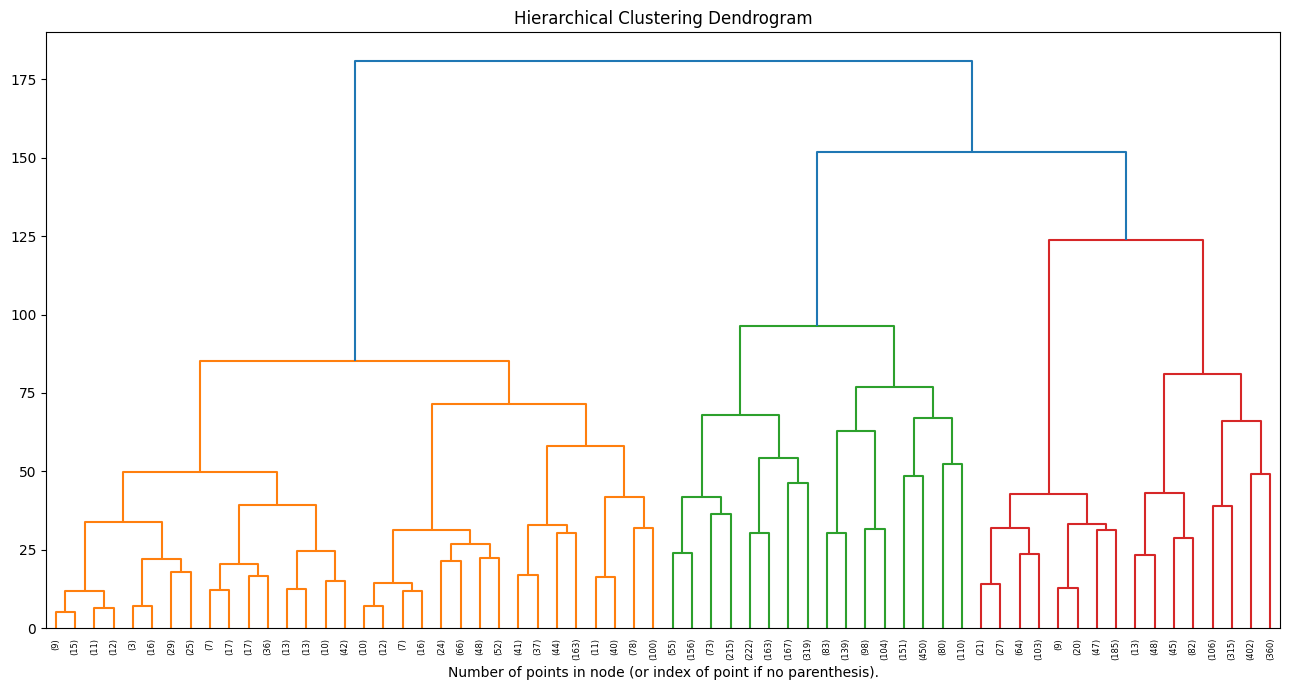

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = std_df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.figure(figsize = (13, 7))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.tight_layout()
plt.show()

## **Classification**

Now, we will analyse the data set that we have to work upon for classifiction.

In [ ]:
pred_Kmeans

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_bars,Local_services,Burger_pizza_shops,Hotels_other_lodgings,Juice_bars,Art_galleries,Dance_clubs,Swimming_pools,Gyms,Bakeries,Beauty_spas,Cafes,View_points,Monuments,Gardens,CLUSTER
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332223,5
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332223,5
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332223,5
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,-0.593603,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332223,5
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,-0.615318,-0.310925,-0.302551,-0.298667,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.163040,-1.332223,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,-0.659458,1.885794,1.210762,-0.005260,-0.141113,-0.252276,-0.651917,-1.305507,-0.999515,-1.371065,-1.107531,-0.815337,-0.594073,-0.571416,1.628058,-0.481343,-0.307364,-0.171354,-0.232428,3.350637,0.090520,2.032709,2.634136,-0.000645,2
5452,-0.635290,1.885794,1.226791,-0.005260,-0.133644,-0.252276,-1.118888,-1.323504,-1.006886,-1.386361,-1.114769,-0.831350,-0.608293,-0.584102,-0.767321,-0.490378,-0.317637,-0.181905,0.515166,0.519298,0.101275,2.032709,2.634136,-0.401825,2
5453,-0.623205,1.885794,1.234806,0.002379,-0.133644,-0.252276,-1.133039,-1.341501,-1.014256,-1.401657,-1.129246,-0.863376,-0.743389,-0.596788,-0.778978,-0.490378,-0.327910,-0.192455,-0.190895,3.350637,0.112031,2.032709,2.634136,-0.384754,2
5454,-0.611121,1.217396,1.250836,0.010018,-0.126175,-0.353658,-1.125963,-1.359498,-1.021627,-1.416953,-1.143723,-0.879389,-0.757609,-0.609474,1.628058,-0.499412,-0.327910,-0.192455,-0.182589,3.350637,0.122786,2.032709,2.634136,-0.376218,2


### **Train, Test and Split**

Now we will split input data (x) and target data (y). And further split the data into testing and training data.

In [ ]:
x = pred_Kmeans.drop("CLUSTER", axis = 1)
y = pred_Kmeans["CLUSTER"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 0)

### **Model Training**

#### **Classifiers And Their Accuracy**

We will apply 5 classifiers - 
  1. Logistic Regression Classifier
  2. Support Vector Classifier (SVM)
  3. K - Nearest Neighbors Classifier (KNN)
  4. Gaussian Naive Bayes Classifier
  5. Decision Tree Classifier

and also caluculate their accuracy and the best one will be choosen.

ACCURACY SCORES
LR :- 98.97360703812316 %
SVC :- 97.72727272727273 %
KNN :- 96.04105571847508 %
GNB :- 91.42228739002933 %
DT :- 94.57478005865103 %
dict_keys(['LR', 'SVC', 'KNN', 'GNB', 'DT'])
dict_values([98.97360703812316, 97.72727272727273, 96.04105571847508, 91.42228739002933, 94.57478005865103])


<Axes: >

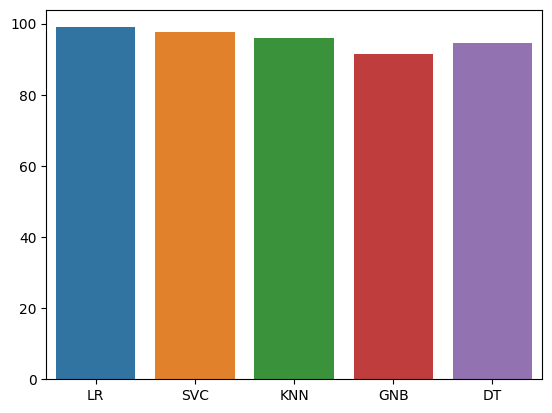

In [ ]:
clf1 = LogisticRegression()
clf2 = SVC()
clf3 = KNeighborsClassifier()
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier()

clf = [clf1, clf2, clf3, clf4, clf5]
clf_name = ['LR', 'SVC', 'KNN', 'GNB', 'DT']
acc = {}

for model, model_name in zip(clf, clf_name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    acc[model_name] = accuracy_score(y_test, pred) * 100

print("ACCURACY SCORES")
for i, j in acc.items():
    print(i, ':-', j, '%')

print(acc.keys())
print(acc.values())

plt.figure()
sns.barplot(x=list(acc.keys()), y=list(acc.values()))

We can see the best accuracy is shown by Logistic Regression on our data.

**Accuracy - 99.12023460410558 %**

(At the point of creating model)

To further increase the accuracy we can apply hyperparameter tuning using Grid Search Cross Validation.


#### **Hyperparameter Tuning**

we will use Grid Search CV for hyperparameter tuning.

In [ ]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]},
              {'tol': [0.0009, 0.001, 0.002, 0.003]}]

grid_search = GridSearchCV(estimator = clf1,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 3,
                           return_train_score=True)


grid_search.fit(x_train, y_train)  

# parameters_dictionary = {'kernel':['linear', 'rbf'],        for svc it gives max 98.50733137829912
#                          'C':[0.0001, 1, 10, 100], 
#                          'gamma':[1, 10, 100]}
# svc = SVC()

# grid_search = GridSearchCV(svc, 
#                            parameters_dictionary, 
#                            scoring = 'accuracy',
#                            return_train_score=True, 
#                            cv = 5,
#                            verbose = 3) # Displays how many combinations of parameters and folds we'll have, for more information as the time to run each search, use 2 or 3 values instead of 1)
# grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END ........penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END ........penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END ........penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END ........penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END ....penalty=l2;, score=(train=0.997, test=0.991) total time=   0.1s
[CV 2/5] END ....penalty=l2;, score=(train=0.996, test=0.985) total time=   0.1s
[CV 3/5] END ....penalty=l2;, score=(train=0.998, test=0.984) total time=   0.1s
[CV 4/5] END ....penalty=l2;, score=(train=0.997, test=0.988) total time=   0.1s
[CV 5/5] END ....penalty=l2;, score=(train=0.998, test=0.988) total time=   0.1s
[CV 1/5] END ...........C=1;, score=(train=0.997, test=0.991) total time=   0.1s
[CV 2/5] END ...........C=1;, score=(train=0.996

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]},
                         {'tol': [0.0009, 0.001, 0.002, 0.003]}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
best_model = grid_search.best_estimator_         # why parameters are not visible_ in case of logistic regression
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(best_model, best_parameters, best_score * 100)

LogisticRegression(C=100) {'C': 100} 98.85136325234126


After Hyperparameter tuning, we have best parameters as - 

  **best_model = LogisticRegression()**

  **best_parameters = {'penalty': 'l2', 'C': 100, 'tol': 0.001}**

  **best_score = 99.09565305653325 %**

In [ ]:
lr_tuned = LogisticRegression(penalty = 'l2', C = 100, tol = 0.001)              # parameters that are seen manually in the grid search cv
lr_tuned.fit(x_train, y_train)

lr_y_pred = lr_tuned.predict(x_test)

best_acc = accuracy_score(lr_y_pred, y_test) * 100
best_acc

98.90029325513197

After applying the Hyperparameter tuning parameters the **Accuracy** becomes **99.26686217008798 %**.

In [ ]:
np.sqrt(mean_squared_error(y_test, lr_y_pred))

0.2344895248052709

Our RMS error is also very very less - 0.21661214442955293

#### **Performance Metrices**

In [ ]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        65
           2       0.98      1.00      0.99       243
           3       0.99      0.99      0.99       466
           4       0.97      0.99      0.98       135
           5       1.00      0.99      0.99       455

    accuracy                           0.99      1364
   macro avg       0.99      0.98      0.98      1364
weighted avg       0.99      0.99      0.99      1364



In [ ]:
cm = confusion_matrix(y_test, lr_y_pred)

<Axes: >

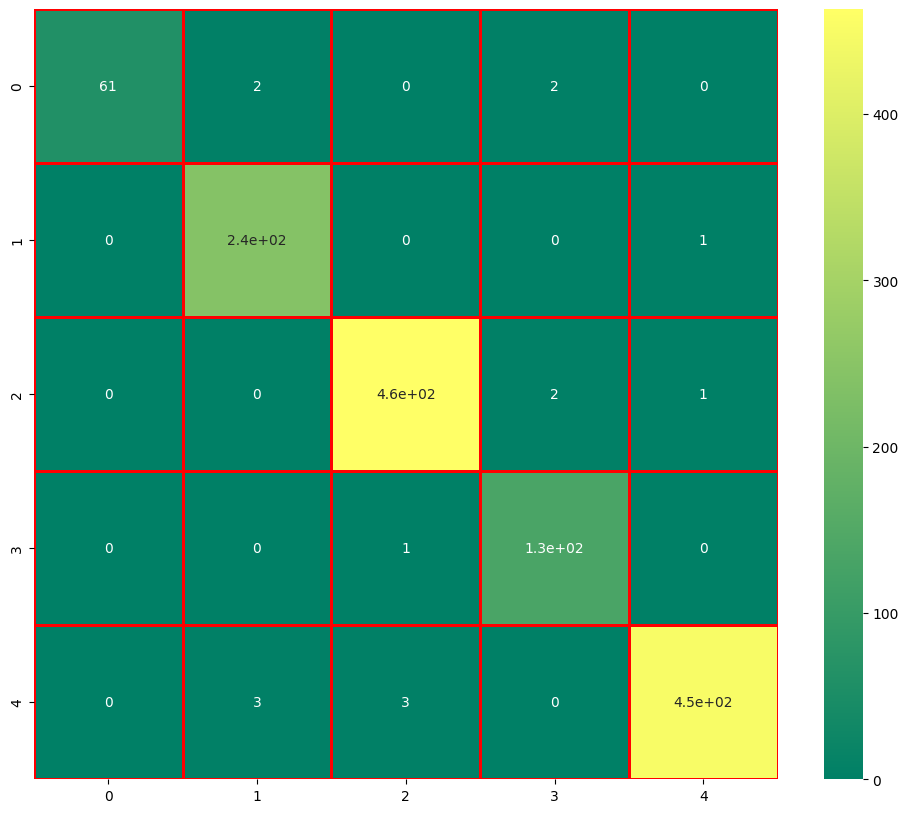

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(cm, annot = True, cbar = True, cmap = "summer", linewidths='1', linecolor = 'red')